# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our First Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Employee Satistaction <font/> 

In [1]:
# Importing the necessary packages for us to use certain functions.
import pandas as pd
import numpy as np
import qdesc as qd
import researchpy as rp

In [2]:
# Loading a data set and storing it into a variable.
df1 = pd.read_excel("Employee Satisfaction.xlsx")
# Checking the first three rows of the data set.
df1.head(5)

,Sex,Age,Educ,Salary,Satisfaction
0,Male,25,Bachelors,17258,3.829963
1,Female,27,Bachelors,12988,2.364636
2,Male,24,Bachelors,13618,5.395812
3,Female,24,Bachelors,12145,1.886536
4,Male,30,Bachelors,14147,1.126840


In [3]:
# Default way of doing descriptives in python.
df1.describe()

,Age,Salary,Satisfaction
count,589.000000,589.000000,589.000000
mean,40.726655,39900.662139,3.547855
std,9.970619,16511.575181,1.467414
min,24.000000,12027.000000,1.000281
25%,32.000000,24704.000000,2.231302
50%,41.000000,39731.000000,3.581325
75%,50.000000,54357.000000,4.836656
max,57.000000,67877.000000,5.992684


In [4]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc(df1)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Age,589.0,40.73,9.97,41.00,9.00,24.0,57.00,8.68,0.78
Salary,589.0,39900.66,16511.58,39731.00,14795.00,12027.0,67877.00,8.00,0.78
Satisfaction,589.0,3.55,1.47,3.58,1.32,1.0,5.99,8.21,0.78


In [5]:
# Saving our results to a spreadsheet file.
res = qd.desc(df1)
res.to_excel("EmpSatDescriptives.xlsx")

In [6]:
# Generate descriptive analysis for satisfation ratings when grouped by sex.
qd.grp_desc(df1, 'Satisfaction', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,271,3.57,1.47,3.38,1.34,1.00,5.99,4.35,0.78
1,Male,318,3.53,1.47,3.70,1.31,1.02,5.97,4.78,0.78


In [7]:
# Generate descriptive analysis for salary when grouped by sex.
qd.grp_desc(df1, 'Salary', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,271,39488.64,16905.10,39913.0,15147.0,12036,67848,4.40,0.78
1,Male,318,40251.79,16187.12,39621.5,14603.5,12027,67877,3.93,0.78


In [8]:
# Generate descriptive analysis for age when grouped by sex.
qd.grp_desc(df1, 'Age', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,271,39.69,9.78,40.0,9.0,24,57,3.94,0.78
1,Male,318,41.61,10.06,43.0,8.0,24,57,5.04,0.78


In [9]:
# Generate descriptive analysis for satisfation ratings when grouped by education.
qd.grp_desc(df1, 'Satisfaction', 'Educ')

,Educ,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Bachelors,125,3.49,1.48,3.19,1.34,1.03,5.98,2.37,0.76
1,Doctorate,226,3.52,1.45,3.61,1.30,1.01,5.99,3.23,0.77
2,Masters,238,3.60,1.49,3.63,1.34,1.00,5.99,3.22,0.77


In [10]:
# Generate descriptive analysis for salary when grouped by education.
qd.grp_desc(df1, 'Salary', 'Educ')

,Educ,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Bachelors,125,17475.21,3365.10,17167.0,3020.0,12027,22987,2.00,0.76
1,Doctorate,226,46178.92,13175.37,47487.5,10688.5,23140,67877,2.79,0.77
2,Masters,238,45717.03,12995.19,45512.5,10904.0,23541,67848,2.71,0.77


In [11]:
# Generate descriptive analysis for age when grouped by education.
qd.grp_desc(df1, 'Age', 'Educ')

,Educ,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Bachelors,125,27.02,2.05,27.0,2.0,24,30,3.50,0.76
1,Doctorate,226,44.43,7.69,45.0,6.0,31,57,2.52,0.77
2,Masters,238,44.41,7.90,45.0,7.0,31,57,3.68,0.77



--- Variable: Age ---
  Anderson-Darling Statistic : 8.6788
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


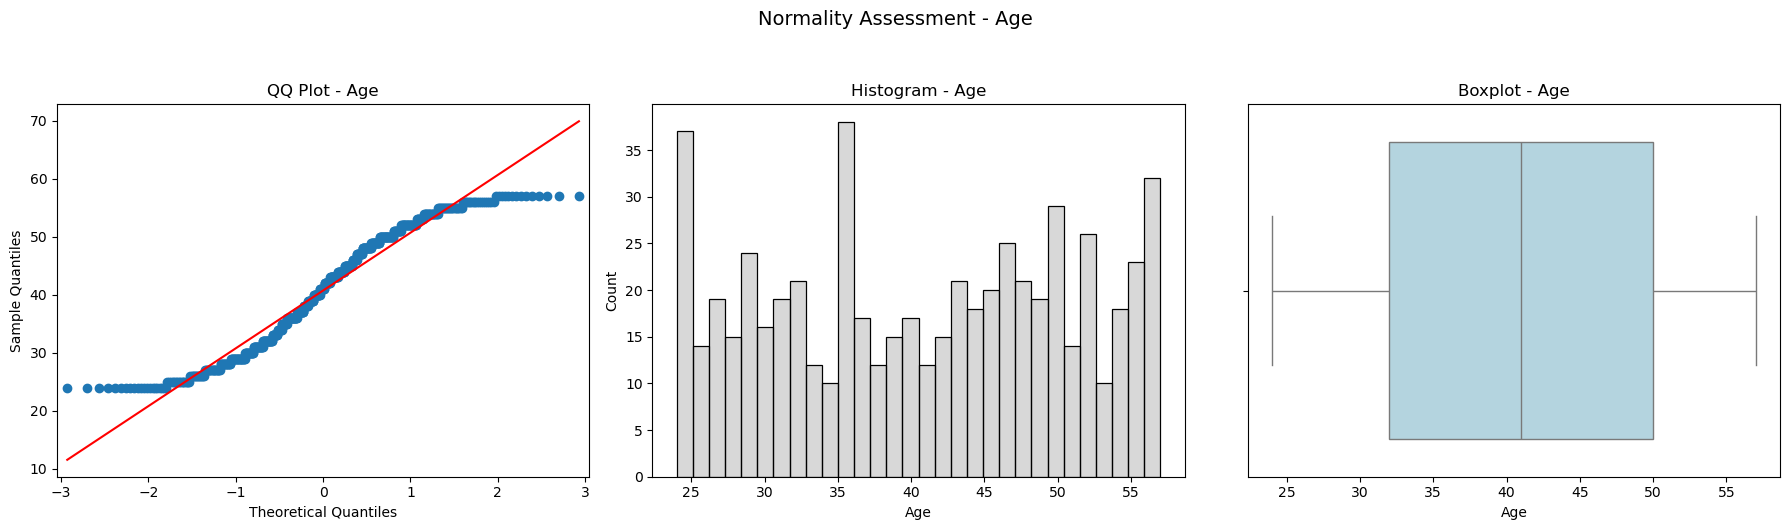


--- Variable: Salary ---
  Anderson-Darling Statistic : 8.0003
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


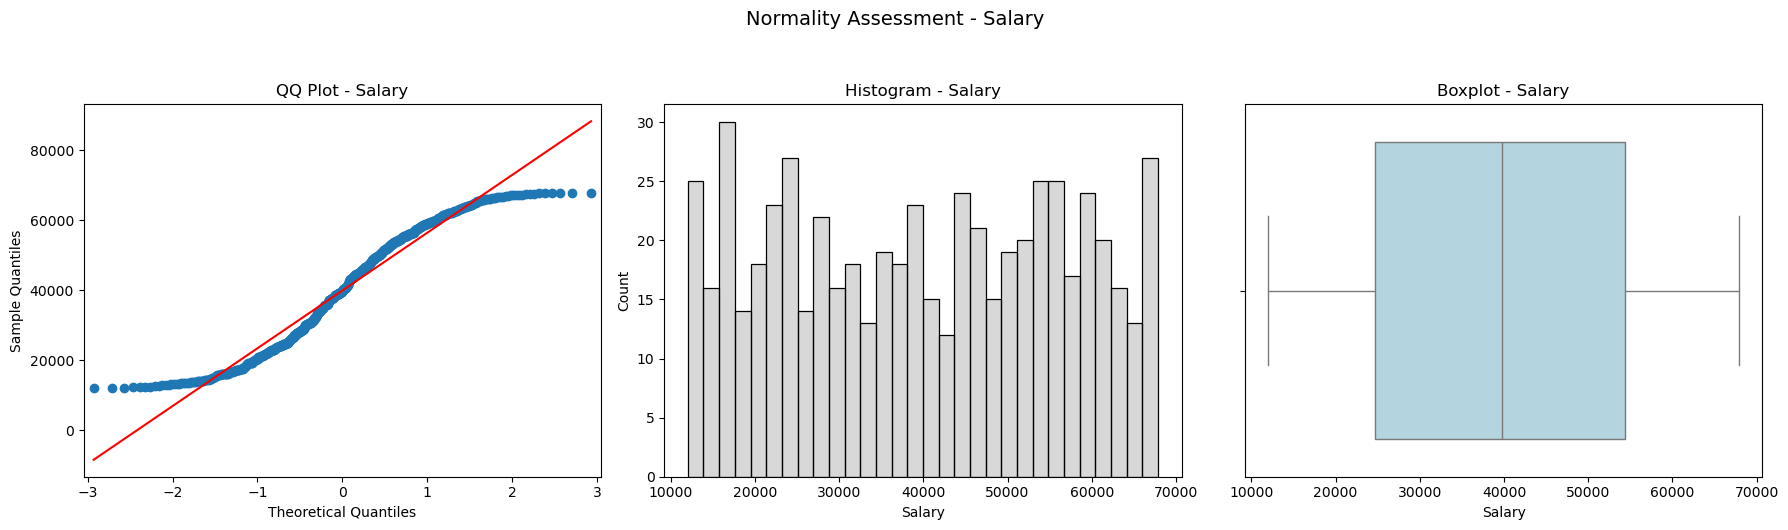


--- Variable: Satisfaction ---
  Anderson-Darling Statistic : 8.2146
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


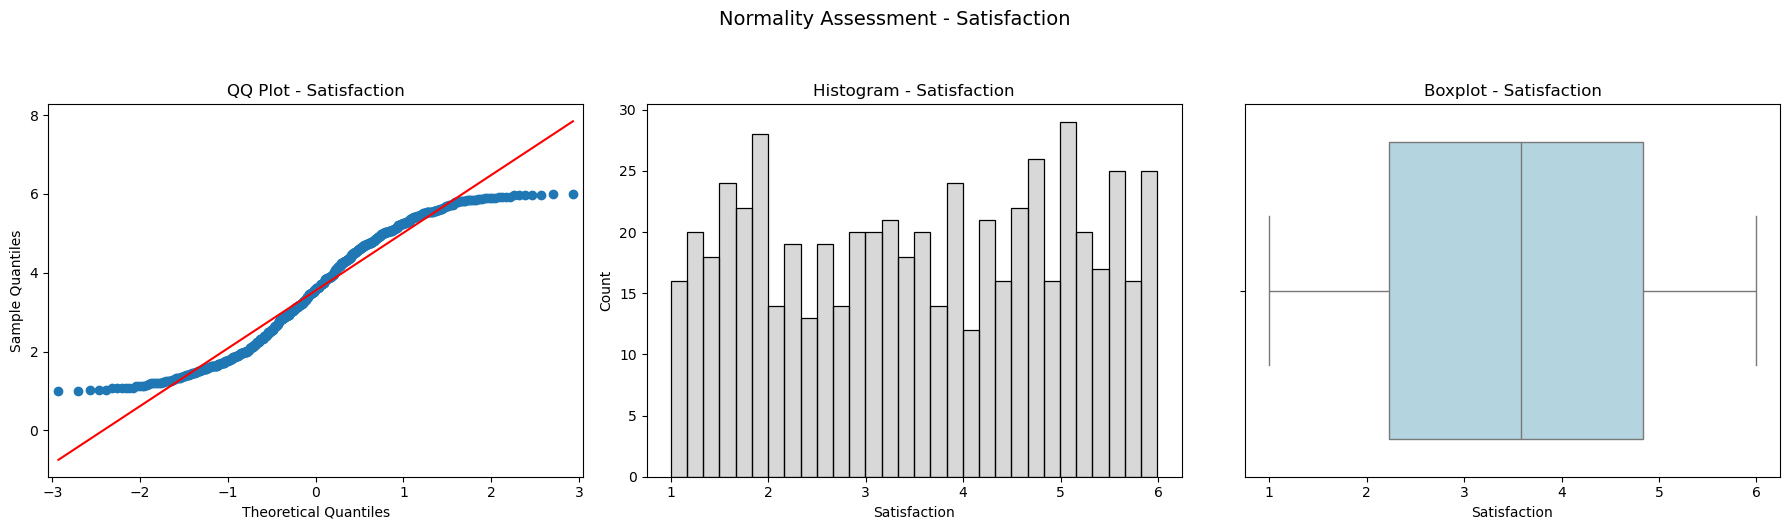

In [12]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(df1)

In [13]:
# Slicing the data frame to have a subset data for males.
Male = df1[df1['Sex'] == 'Male'] # Slicing the data frame to only include the males.
Male.head() # checking out the data subset.

,Sex,Age,Educ,Salary,Satisfaction
0,Male,25,Bachelors,17258,3.829963
2,Male,24,Bachelors,13618,5.395812
4,Male,30,Bachelors,14147,1.126840
5,Male,28,Bachelors,17556,1.860923
6,Male,30,Bachelors,13185,4.105208


In [14]:
# Confirming that the subset is all males.
np.unique(Male.Sex)

array(['Male'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 5.0421
  Critical Value (@ 5.0%) : 0.7770
  Decision : Reject Null


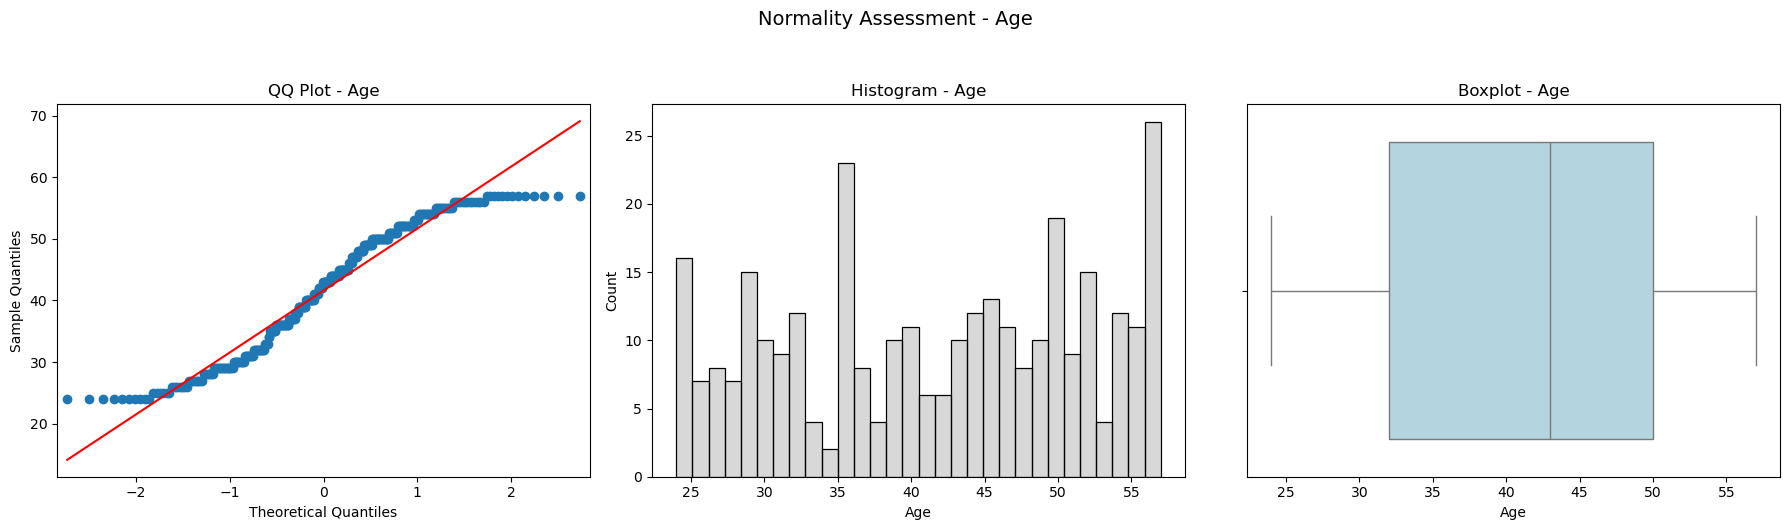


--- Variable: Salary ---
  Anderson-Darling Statistic : 3.9318
  Critical Value (@ 5.0%) : 0.7770
  Decision : Reject Null


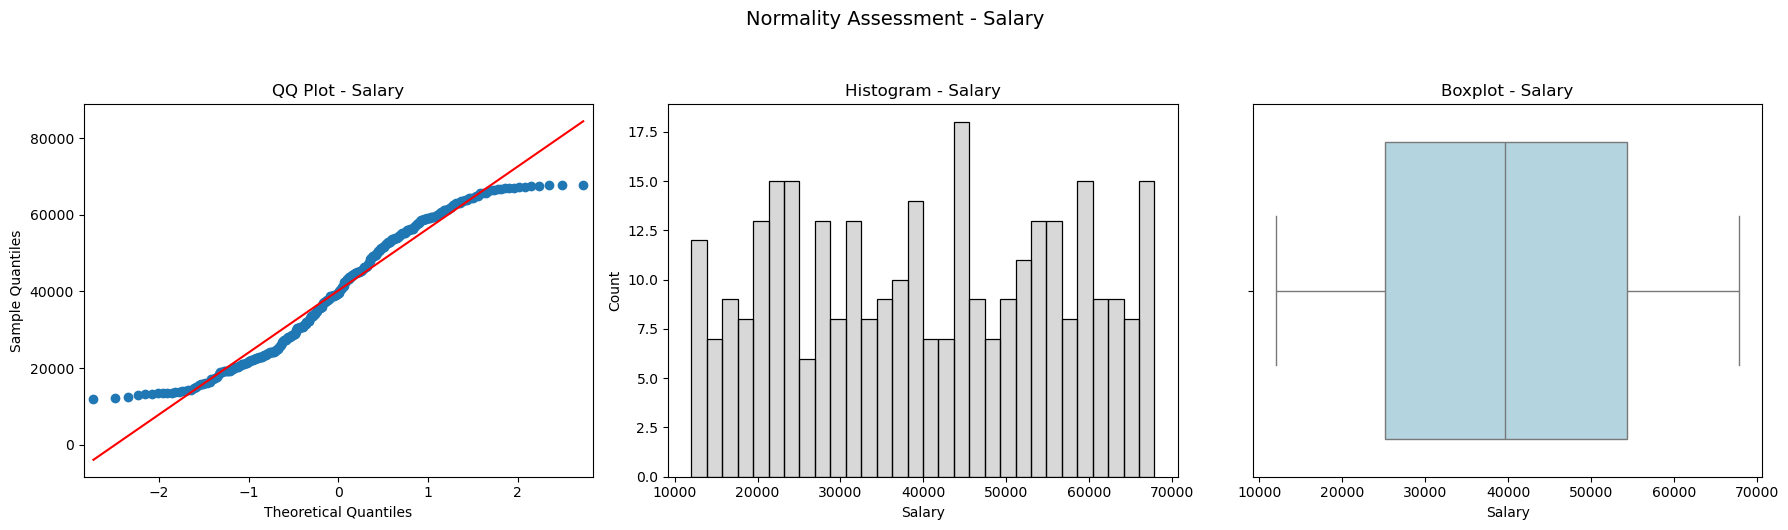


--- Variable: Satisfaction ---
  Anderson-Darling Statistic : 4.7802
  Critical Value (@ 5.0%) : 0.7770
  Decision : Reject Null


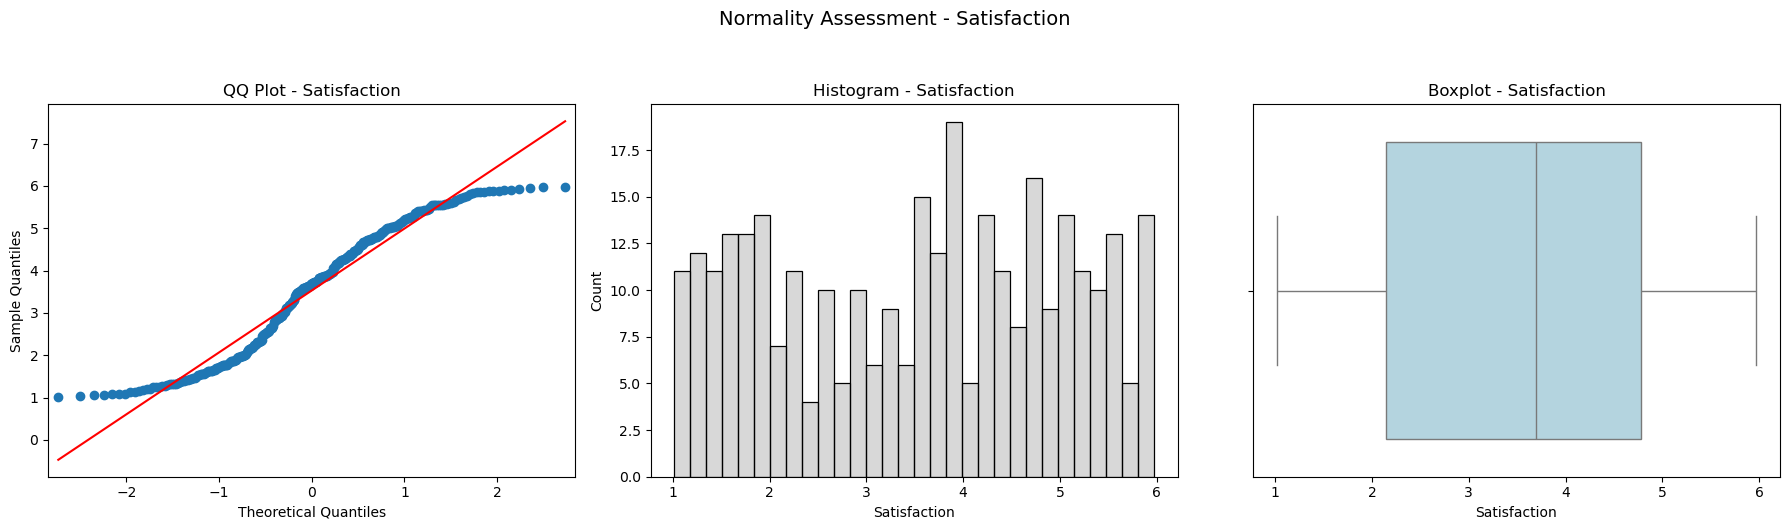

In [15]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Male)

In [16]:
# Slicing the data frame to have a subset data for females.
Female = df1[df1['Sex'] == 'Female'] # Slicing the data frame to only include the females.
Female.head() # checking out the data subset.

,Sex,Age,Educ,Salary,Satisfaction
1,Female,27,Bachelors,12988,2.364636
3,Female,24,Bachelors,12145,1.886536
7,Female,24,Bachelors,16163,5.513412
9,Female,25,Bachelors,17562,2.605302
10,Female,25,Bachelors,16699,3.186842


In [17]:
# Confirming that the subset is all females.
np.unique(Female.Sex)

array(['Female'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 3.9354
  Critical Value (@ 5.0%) : 0.7760
  Decision : Reject Null


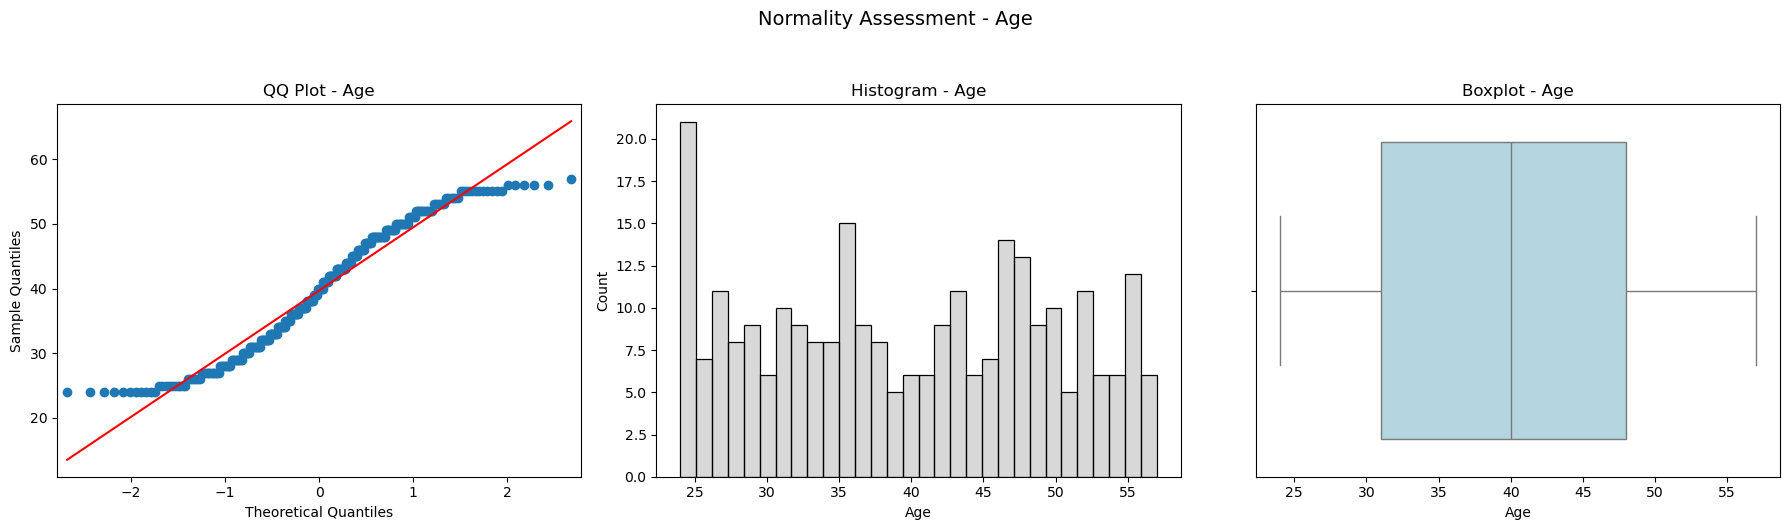


--- Variable: Salary ---
  Anderson-Darling Statistic : 4.3994
  Critical Value (@ 5.0%) : 0.7760
  Decision : Reject Null


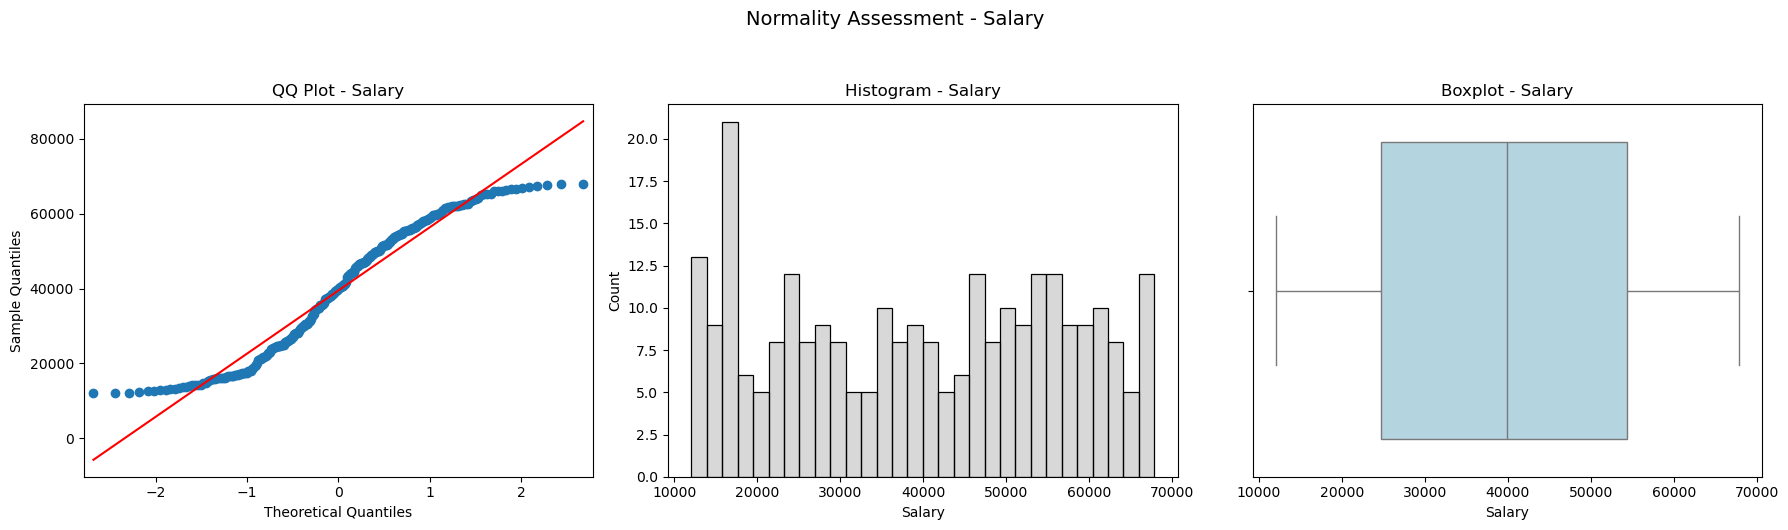


--- Variable: Satisfaction ---
  Anderson-Darling Statistic : 4.3497
  Critical Value (@ 5.0%) : 0.7760
  Decision : Reject Null


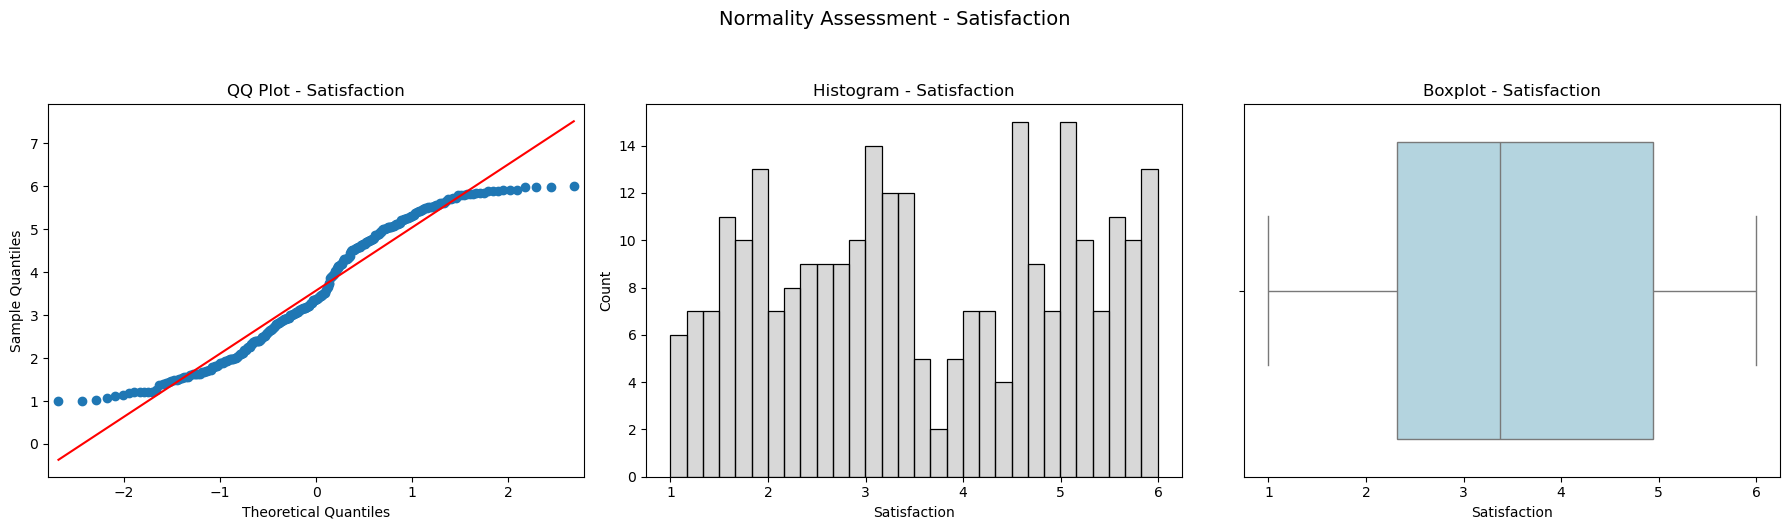

In [18]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Female)

In [19]:
# Generating a frequency distribution for a specified variable
qd.freqdist(df1, 'Sex')

,Sex,Count,Percentage
0,Male,318,53.99
1,Female,271,46.01


In [20]:
# Generating a frequency distribution for a specified variable
qd.freqdist(df1, 'Educ')

,Educ,Count,Percentage
0,Masters,238,40.41
1,Doctorate,226,38.37
2,Bachelors,125,21.22


In [21]:
# Generating a frequency distribution for all the categorical features from the said data frame.
qd.freqdist_a(df1)

,Column,Value,Count,Percentage
0,Sex,Male,318,53.99
1,Sex,Female,271,46.01
2,Educ,Masters,238,40.41
3,Educ,Doctorate,226,38.37
4,Educ,Bachelors,125,21.22


In [22]:
# Generating a frequency distribution but this time have it store in an excel file and organized
# on a per sheet basis per categorical feature.
qd.freqdist_to_excel(df1, "EmpSatCategorical.xlsx")

Frequency distributions written to EmpSatCategorical.xlsx
